<a href="https://colab.research.google.com/github/joao-montanari/banco-de-sangue/blob/main/banco_de_sangue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Banco de Sangue**
---



# 1. Importação das bibliotecas

Importação das bibliotecas necessárias para o projeto

- **NumPy (Numerical Python):** Serve para manipulação de arrays (vetores, matrizes, etc.) e para operações matemáticas avançadas (como estatística, álgebra linear, transformadas, etc.).
- **Matplotlib (Pyplot):** Biblioteca para visualização de dados com gráficos 2D (linhas, barras, dispersão, histogramas, etc.).
- **Pandas:** Serve para manipulação e análise de dados tabulares (como planilhas, bases CSV, SQL, etc.).
- **mpl_toolkits.mplot3d (Axes3D):** Extensão do Matplotlib para gerar gráficos tridimensionais (3D).
- **Seaborn:** Biblioteca baseada no Matplotlib para criar gráficos estatísticos mais bonitos e informativos, com menos código.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import geopandas as gpd

# 2. Importação dos dados

Por meio da biblioteca **Pandas** vazemos a leitura dos dados que existem dentro do excel "banco_de_sangue_data.xlsx" e transformamos eles em DataFrame.

In [27]:
# Transforma todos os dados do excel em um único DataFrame
df_banco_de_sangue = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name=None)

# Cria um DataFrame para cada tabela que existe dentro do excel
df_enderecos = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='enderecos')
df_horarios = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='horarios')
df_estoque = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='estoque')
df_hemocentros = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='hemocentros')
df_pessoas = pd.read_excel('banco_de_sangue_data.xlsx', sheet_name='pessoas')

# Exibe as primeiras linhas de cada DataFrame
for nome_aba, df in df_banco_de_sangue.items():
    print(f"ABA: {nome_aba} - TAMANHO: {df.shape[0]}")
    display(df.head())  # mostra as 5 primeiras linhas de cada aba
    print('\n')
    print('-='*60)
    print('\n')

ABA: enderecos - TAMANHO: 100


,ID,NUMERO,BAIRRO,RUA,CIDADE,ESTADO,PAIS,CEP,LATITUDE,LONGITUDE
0,0,812,Funcionários,Ladeira Ana Júlia Rezende,da Rocha,ES,Brasil,64352-805,-24.478985,-41.286377
1,1,33,Tupi A,Residencial Gomes,Lopes de da Luz,RJ,Brasil,65360-058,-18.739775,-44.577265
2,2,33,Vila Nova Cachoeirinha 2ª Seção,Área Murilo Viana,da Conceição,ES,Brasil,16639-670,-23.109315,-48.473523
3,3,288,Inconfidência,Parque de Lima,da Mota de Novaes,MG,Brasil,09162-202,-21.168702,-50.819875
4,4,740,Pindura Saia,Aeroporto de Rodrigues,Ferreira,RJ,Brasil,95167-329,-18.490795,-48.718617




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: horarios - TAMANHO: 100


,ID,SEG,TER,QUA,QUI,SEX,SAB,DOM
0,0,11:00-19:00,fechado,06:00-16:00,12:00-20:00,07:00-22:00,09:00-15:00,fechado
1,1,08:00-13:00,fechado,07:00-17:00,11:00-17:00,fechado,12:00-17:00,10:00-16:00
2,2,09:00-16:00,fechado,07:00-19:00,fechado,09:00-20:00,12:00-21:00,fechado
3,3,09:00-14:00,10:00-15:00,fechado,11:00-22:00,06:00-19:00,12:00-14:00,09:00-20:00
4,4,09:00-20:00,fechado,07:00-21:00,11:00-14:00,09:00-16:00,07:00-17:00,11:00-21:00




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: estoque - TAMANHO: 100


,ID,A+,A-,B+,B-,AB+,AB+2,O+,O-
0,0,155,147,310,394,143,368,269,397
1,1,341,221,303,261,120,339,240,98
2,2,220,162,363,71,149,340,344,287
3,3,361,203,262,112,311,388,395,118
4,4,283,370,141,121,52,165,328,229




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: hemocentros - TAMANHO: 100


,ID,NOME,ENDERECO_ID,MEDICOS,CAPACIDADE_MAX,HORARIO_ID,ESTOQUE_ID
0,0,Hemocentro Vida Nova,0,18,60,0,0
1,1,Banco de Sangue Esperança,1,19,74,1,1
2,2,Hemocentro Solidário,2,21,57,2,2
3,3,Centro de Hemoterapia Salvar Vidas,3,26,32,3,3
4,4,Hemocentro Santa Clara,4,14,60,4,4




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


ABA: pessoas - TAMANHO: 1000


,ID,NOME,NASCIMENTO,TIPO_SANG,PESO,ALTURA,HEMOCENTRO_ID
0,0,Maria Silva,1985-04-27 00:00:00,B+,112,1.77,15
1,1,João Santos,1993-12-19 00:00:00,O-,92,2.09,60
2,2,Ana Oliveira,1977-08-05 00:00:00,O+,74,2.04,83
3,3,Pedro Souza,2001-03-14 00:00:00,O+,77,1.72,26
4,4,Sofia Pereira,1989-11-02 00:00:00,O+,66,1.88,58




-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




# 3. Visualização dos Hemocentros no Brasil

Por meio do gráfico do Brasil conseguimos ver que todos os hemocentros cadastrados em nossa base de dados estão localizados na região sudeste do país.

Essa informação foi puxada da tabela de endereços que é referenciada detro da tabela de hemocentros por meio da coluna *endereco_id*. Para mostrar o local na onde o hemocentro fica no mapa do Brasil foi usado as colunas Latitude e Longitude.

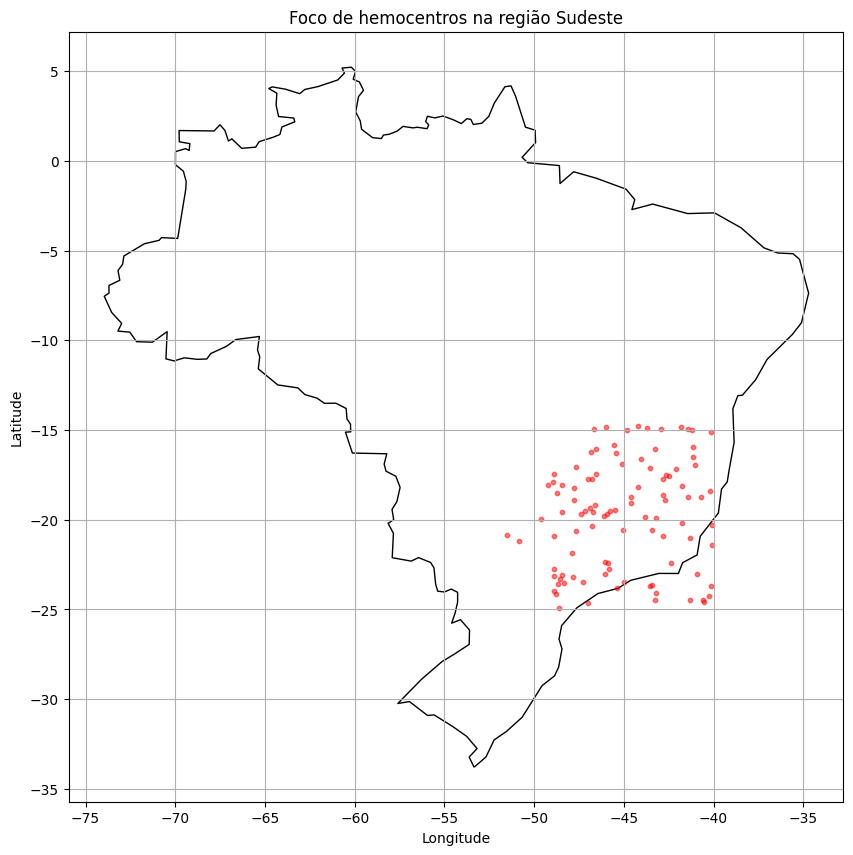

In [28]:
gdf = gpd.GeoDataFrame(df_enderecos, geometry=gpd.points_from_xy(df_enderecos['LONGITUDE'], df_enderecos['LATITUDE'])) # Transformando o DataFrame comum em GeoDataFrame
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

brasil = gpd.read_file(url).query('SOVEREIGNT=="Brazil"') # Carrega o mapa básico do Brasil

fig, ax = plt.subplots(figsize=(10,10))
brasil.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)

plt.title("Foco de hemocentros na região Sudeste")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Agora que sabemos que existem apenas hemocentros na região Sudeste do Brasil, podemos organizar as informações para visualizar a quantidade de hemocentros por estado da região.


Resutado do dicionário: {'ES': 26, 'RJ': 24, 'MG': 25, 'SP': 25}



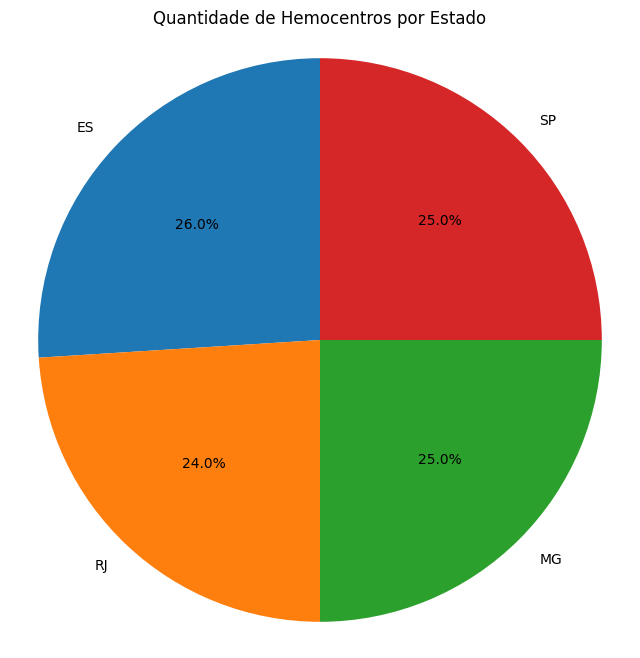

In [67]:
hemocentro_por_estado = dict()

# varre a coluna ESTADO da tabela de endereços e mapeia a quantidade de hemocentro por estado no dicionário hemocentro_por_estado
for estado in df_enderecos['ESTADO']:
  if(estado in hemocentro_por_estado):
    hemocentro_por_estado[estado] += 1
  else:
    hemocentro_por_estado[estado] = 1

print(f"\nResutado do dicionário: {hemocentro_por_estado}\n")

fig_pie, ax_pie = plt.subplots(figsize=(8,8))
ax_pie.pie(hemocentro_por_estado.values(), labels=hemocentro_por_estado.keys(), autopct='%1.1f%%', startangle=90)
ax_pie.axis('equal')
plt.title('Quantidade de Hemocentros por Estado')
plt.show()


# 4. Leitura da tabela pessoas

### 4.1 Pessoas por hemocentro

{0: 'Hemocentro Vida Nova', 1: 'Banco de Sangue Esperança', 2: 'Hemocentro Solidário', 3: 'Centro de Hemoterapia Salvar Vidas', 4: 'Hemocentro Santa Clara', 5: 'Fundação Pró-Sangue Campinas', 6: 'Hemocentro Regional Bandeirantes', 7: 'Instituto de Hemoterapia São Lucas', 8: 'Hemocentro Coração Amigo', 9: 'Doar para Viver Hemocentro', 10: 'Hemocentro Aurora', 11: 'Banco de Vida Hemocentro', 12: 'Hemocentro Luz da Vida', 13: 'Centro Hemoterápico União', 14: 'Hemocentro Dr. Carlos Chagas', 15: 'Hemocentro Municipal', 16: 'Hemocentro Estadual', 17: 'Hemocentro Viva Mais', 18: 'Rede Hemocentro Brasil', 19: 'Hemocentro Paulistano', 20: 'Hemocentro do Sul', 21: 'Hemocentro do Norte', 22: 'Hemocentro do Leste', 23: 'Hemocentro do Oeste', 24: 'Hemocentro Amigo do Doador', 25: 'Hemocentro Renascer', 26: 'Banco de Sangue do Povo', 27: 'Hemocentro Cidadão', 28: 'Hemocentro Vida Plena', 29: 'Centro de Doação Sanguínea Essencial', 30: 'Hemocentro Ouro Preto', 31: 'Hemocentro da Paz', 32: 'Instituto 

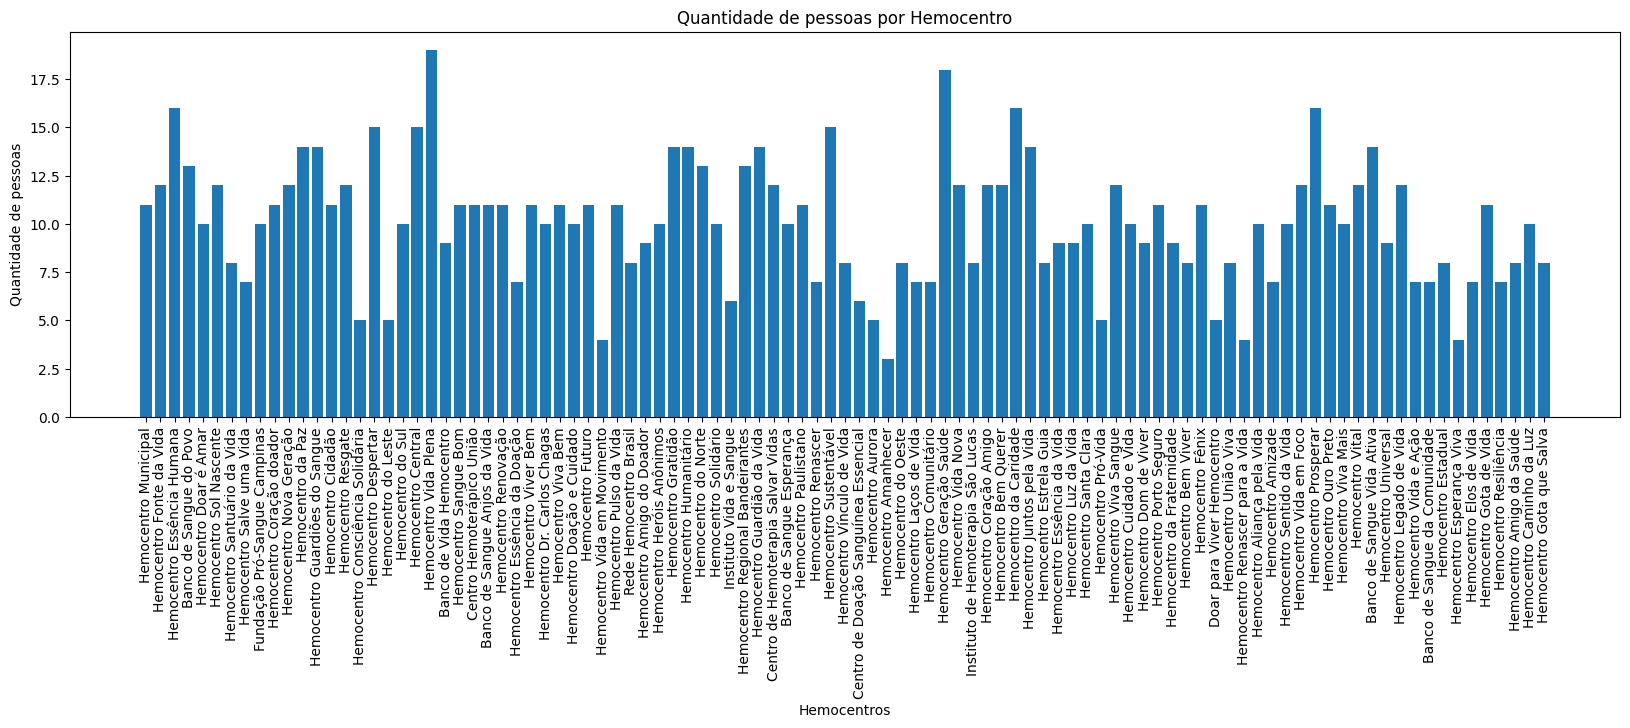

In [62]:
# Primeiro temos que mapear todos os hemocentros por nome e ID
nome_por_id_hemocentro = dict()

for index, row in df_hemocentros.iterrows():
  nome_por_id_hemocentro[row['ID']] = row['NOME']

print(f"Primeiro mapeia o ID do hemocentro com o seu nome: {nome_por_id_hemocentro}")

# Agora, aproveitamos o ID usado como chave no dicionário nome_por_id_hemocentro
# para contar a quantidade de pessoas que foram no hemocentro com aquele determinado nome
# criando um novo dicionário com referência de pessoas por hemocentro
pessoas_por_hemocentro = dict()

for hemocentro_id in df_pessoas['HEMOCENTRO_ID']:
  if(nome_por_id_hemocentro[hemocentro_id] in pessoas_por_hemocentro):
    pessoas_por_hemocentro[nome_por_id_hemocentro[hemocentro_id]] += 1
  else:
    pessoas_por_hemocentro[nome_por_id_hemocentro[hemocentro_id]] = 1

print(f"\nResutado do dicionário: {pessoas_por_hemocentro}\n")

# Formatação da tabela com matplotlib
plt.figure(figsize=(20,5))
plt.bar(pessoas_por_hemocentro.keys(), pessoas_por_hemocentro.values())
plt.xlabel('Hemocentros')
plt.ylabel('Quantidade de pessoas')
plt.title('Quantidade de pessoas por Hemocentro')
plt.xticks(rotation=90)
plt.show()

### 4.2 Pessoas por tipo sanguíneo


Dicionário resultado: {'B+': 151, 'O-': 132, 'O+': 129, 'A': 141, 'A+': 159, 'AB+': 136, 'AB': 152}



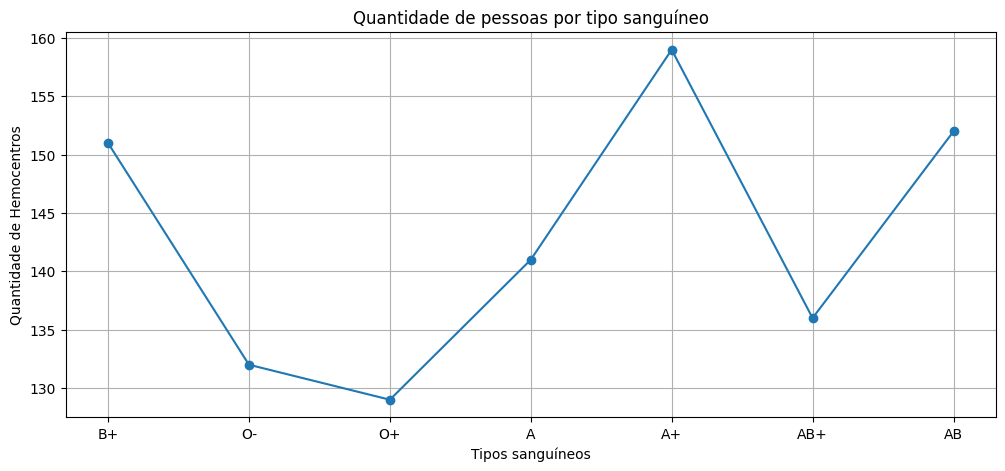

In [73]:
pessoas_por_tipo_sanguineo = dict()

for tipo_sanguineo in df_pessoas['TIPO_SANG']:
  if(tipo_sanguineo in pessoas_por_tipo_sanguineo):
    pessoas_por_tipo_sanguineo[tipo_sanguineo] += 1
  else:
    pessoas_por_tipo_sanguineo[tipo_sanguineo] = 1

print(f"\nDicionário resultado: {pessoas_por_tipo_sanguineo}\n")

plt.figure(figsize=(12,5))
plt.plot(pessoas_por_tipo_sanguineo.keys(), pessoas_por_tipo_sanguineo.values(), marker='o')
plt.xlabel('Tipos sanguíneos')
plt.ylabel('Quantidade de Hemocentros')
plt.title('Quantidade de pessoas por tipo sanguíneo')
plt.grid()
plt.show()
